<a href="https://colab.research.google.com/github/JiteshNayak2004/kodikon_team2/blob/main/agrisaathi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
import joblib
from joblib import Parallel, delayed
import pickle



importing dataset

In [ ]:
dataset = pd.read_csv('Crop_recommendation.csv')
X= dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1:].values
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


parameters in the dataset


In [ ]:
print(dataset.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


the crops we predict

In [ ]:
print(dataset['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

training and fitting on a random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomFC = RandomForestClassifier()
randomFC.fit(X_train, y_train)

<ipython-input-35-f01d43f6b5ac>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomFC.fit(X_train, y_train)


RandomForestClassifier()

correlation matrix

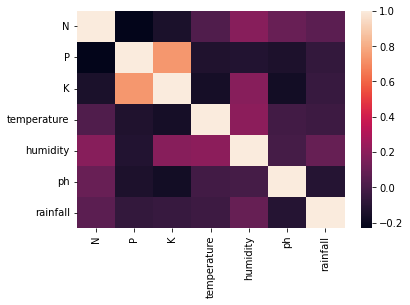

In [ ]:
dataplot=sns.heatmap(dataset.corr())

predicting and seeing how the model performs

In [ ]:
y_pred = randomFC.predict(X_test)
#plt.plot(X_train,randomFC.predict(X_train), color = 'blue')
print(y_train)


[['cotton']
 ['grapes']
 ['blackgram']
 ...
 ['blackgram']
 ['lentil']
 ['orange']]


model accuracy

In [ ]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.9981818181818182


testing for random value

In [ ]:
y_demo = randomFC.predict([[40,14,59,26,81,7,201]])
print(y_demo)

['pomegranate']


checking if the prediction makes sense

In [ ]:
# condition with df.values property
mask = dataset['label'].values == 'watermelon'
 
# new dataframe
df_new = dataset[mask]
 
print(df_new)

      N   P   K  temperature   humidity        ph    rainfall        label
900   2  24  38    24.559816  91.635362  5.922936  111.968462  pomegranate
901   6  18  37    19.656901  89.937010  5.937650  108.045893  pomegranate
902   8  26  36    18.783596  87.402477  6.804781  102.518476  pomegranate
903  37  18  39    24.146963  94.511066  6.424671  110.231663  pomegranate
904   0  27  38    22.445813  89.901470  6.738016  109.390600  pomegranate
..   ..  ..  ..          ...        ...       ...         ...          ...
995  33  23  45    20.002190  85.836182  7.116539  112.337046  pomegranate
996   4  14  41    19.851393  89.807323  6.430163  102.818636  pomegranate
997  13  17  45    21.254336  92.650589  7.159521  106.278467  pomegranate
998  39  24  39    23.653741  93.326575  6.431266  109.807618  pomegranate
999   8  28  37    23.884048  86.206138  6.082572  108.312179  pomegranate

[100 rows x 8 columns]


saving the model in a pickle file

In [ ]:
pickle.dump(randomFC, open('crop_recommender.pkl', 'wb'))